In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

### Question 1

In [ ]:
df = pd.read_csv("weather_data_1000_cleaned.csv")
df.head()

df['Month'] = pd.DatetimeIndex(df['Date']).month

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df['Month'] = df['Month'].apply(lambda x: months[int(x)-1])

df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

precipitation = df.groupby('Month', observed=False)['Precipitation'].sum()
humidity = df.groupby('Month', observed=False)['Humidity'].mean()
temperature = df.groupby('Month', observed=False)['Temperature'].mean()

ordered_precipitation = precipitation.sort_values(ascending=False)



In [11]:
# Les mois les plus pluvieux
ordered_precipitation

Month
Jul    225
Aug    185
Jun    180
Dec    170
Nov    165
Feb    160
Jan    155
May    155
Oct    130
Apr    115
Sep    105
Mar     95
Name: Precipitation, dtype: int64

In [12]:
# Les mois les plus humides
humidity.sort_values(ascending=False)

Month
Apr    70.617391
Mar    68.818182
May    64.208750
Feb    63.039474
Jun    57.001205
Jan    56.878750
Jul    45.884615
Dec    44.670455
Aug    38.473913
Nov    35.497727
Sep    35.112821
Oct    34.300000
Name: Humidity, dtype: float64

Les mois les plus pluvieux sont Juillet, Aout Juin
 
Il y a effectivement une grande différence en terme d'humidité entre les mois en passant de 34% a 70%

### Question 2

Text(0, 0.5, 'Température')

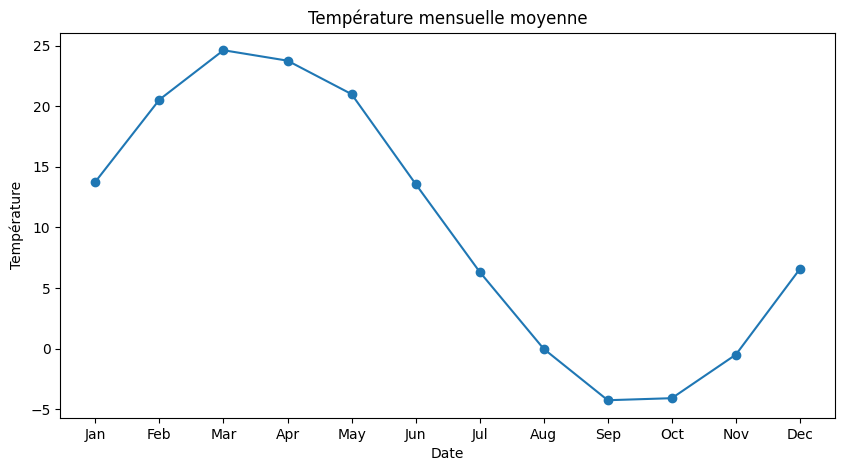

In [13]:
# order month 
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
plt.figure(figsize=(10, 5))
plt.plot(df.groupby('Month', observed=False)['Temperature'].mean(), marker='o')
plt.title('Température mensuelle moyenne')
plt.xlabel('Date')
plt.ylabel('Température')

La température est la plus élevée en Mars.

Elle suivent bien une logique saisonière mais probablement pas la même que celle de la France.

### Question 3

Text(0.5, 0, 'Précipitations')

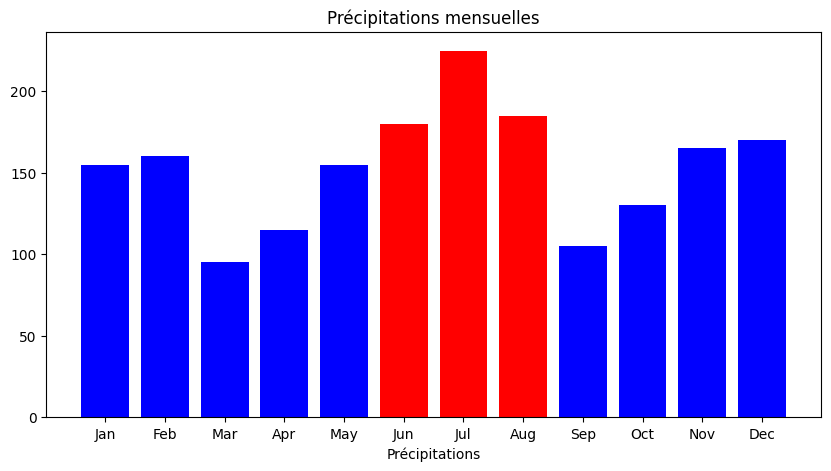

In [14]:
plt.figure(figsize=(10, 5))

# Plotting the monthly precipitation
# Highlighting the top 3 rainy months
plt.bar(precipitation.index, precipitation, label='Precipitation', color=['red' if x in ordered_precipitation[:3].index else 'blue' for x in precipitation.index])
plt.title('Précipitations mensuelles')
plt.xlabel('Précipitations')

Les mois avec les précipitations les plus importantes sont Juillet, Aout, Juin.

<Axes: >

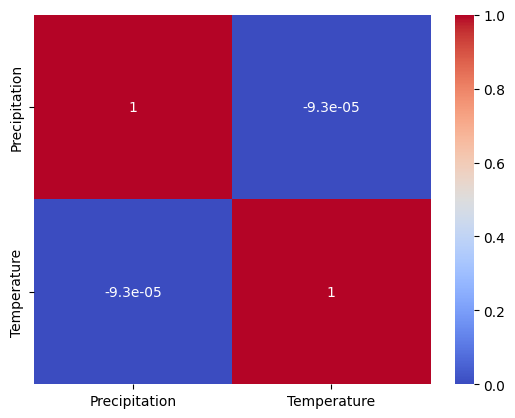

In [15]:
sns.heatmap(df[['Precipitation', 'Temperature']].corr(numeric_only=True), annot=True, cmap='coolwarm')

La corrélation entre les précipitations et la température est quasiment nulle.

# Etape 4 - Créer un tableau de bord interactif

In [16]:
precipitation

Month
Jan    155
Feb    160
Mar     95
Apr    115
May    155
Jun    180
Jul    225
Aug    185
Sep    105
Oct    130
Nov    165
Dec    170
Name: Precipitation, dtype: int64

In [17]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=make_subplots(
        specs=[[{"secondary_y": True}]])
fig.update_layout(title_text='Température et précipitations mensuelles')   

fig.update_layout(xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},yaxis_domain=[0, 0.94])

fig.add_trace(
    go.Bar(x=precipitation.index,
           y=precipitation,
           name="Précipitations",
          ), secondary_y=False)

fig.add_trace(
    go.Scatter(x=temperature.index,
            y=temperature,
            name="Température",
            line_color="#ee0000"), secondary_y=True)
fig.data[1].update(xaxis='x2')
fig.update_layout(width=700, height=475)